# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

(X^T * X)^(-1) * X ^ T * y

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

In [19]:
a = np.array([1, 2,3 , 4])
np.dot(a, a)

30

In [6]:
 np.array([[1, 2, 3], [3, 4, 6]]) * np.array([4, 5, 7]) 

array([[ 4, 10, 21],
       [12, 20, 42]])

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [737]:
from dataclasses import dataclass
from enum import auto
from enum import Enum
from typing import Dict
from typing import Type

import numpy as np


@dataclass
class LearningRate:
    lambda_: float = 1e-3
    s0: float = 1
    p: float = 0.5

    iteration: int = 0

    def __call__(self):
        """
        Calculate learning rate according to lambda (s0/(s0 + t))^p formula
        """
        self.iteration += 1
        return self.lambda_ * (self.s0 / (self.s0 + self.iteration)) ** self.p


class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()


class BaseDescent:
    """
    A base class and templates for all functions
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        """
        :param dimension: feature space dimension
        :param lambda_: learning rate parameter
        :param loss_function: optimized loss function
        """
        self.w: np.ndarray = np.random.rand(dimension)
        self.lr: LearningRate = LearningRate(lambda_=lambda_)
        self.loss_function: LossFunction = loss_function

    def step(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        return self.update_weights(self.calc_gradient(x, y))

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        Template for update_weights function
        Update weights with respect to gradient
        :param gradient: gradient
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        pass

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Template for calc_gradient function
        Calculate gradient of loss function with respect to weights
        :param x: features array
        :param y: targets array
        :return: gradient: np.ndarray
        """
        pass

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculate loss for x and y with our weights
        :param x: features array
        :param y: targets array
        :return: loss: float
        """
        diff_vec = np.dot(x, self.w) - y
        return (1 / x.shape[0]) * np.dot(diff_vec, diff_vec)

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Calculate predictions for x
        :param x: features array
        :return: prediction: np.ndarray
        """
        return np.dot(x, self.w)


class VanillaGradientDescent(BaseDescent):
    """
    Full gradient descent class
    """

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """

        ans = -self.lr() * gradient
        self.w += ans
        return ans

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        return -2 / (x.shape[0]) * np.transpose(x) @ (y - x @ self.w)


class StochasticDescent(VanillaGradientDescent):
    """
    Stochastic gradient descent class
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, batch_size: int = 50,
                 loss_function: LossFunction = LossFunction.MSE):
        """
        :param batch_size: batch size (int)
        """
        super().__init__(dimension, lambda_, loss_function)
        self.batch_size = batch_size

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        # TODO: implement calculating gradient function
        batch_indexes = np.random.randint(0, x.shape[0], self.batch_size)
        x_p = x[batch_indexes]
        return - 2 / (x_p.shape[0]) * np.transpose(x_p) @ (y[batch_indexes] - x_p @ self.w)


class MomentumDescent(VanillaGradientDescent):
    """
    Momentum gradient descent class
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        super().__init__(dimension, lambda_, loss_function)
        self.alpha: float = 0.9

        self.h: np.ndarray = np.zeros(dimension)

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        # TODO: implement updating weights function

        self.h = self.alpha * self.h + self.lr() * gradient
        ans = -self.h
        self.w += ans
        return ans


class Adam(VanillaGradientDescent):
    """
    Adaptive Moment Estimation gradient descent class
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        super().__init__(dimension, lambda_, loss_function)
        self.eps: float = 1e-8

        self.m: np.ndarray = np.zeros(dimension)
        self.v: np.ndarray = np.zeros(dimension)

        self.beta_1: float = 0.9
        self.beta_2: float = 0.999

        self.iteration: int = 0

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        self.iteration += 1
        self.m = self.beta_1 * self.m + (1 - self.beta_1) * gradient
        self.v = self.beta_2 * self.v + (1 - self.beta_2) * gradient ** 2
        m_ = self.m / (1 - self.beta_1 ** self.iteration)
        v_ = self.v / (1 - self.beta_2 ** self.iteration)
        ans = -(self.lr() / (np.sqrt(v_) + self.eps)) * m_
        self.w += ans
        return ans


class BaseDescentReg(BaseDescent):
    """
    A base class with regularization
    """

    def __init__(self, *args, mu: float = 0, **kwargs):
        """
        :param mu: regularization coefficient (float)
        """
        super().__init__(*args, **kwargs)

        self.mu = mu

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Calculate gradient of loss function and L2 regularization with respect to weights
        """

        return super().calc_gradient(x, y) + self.mu * np.transpose(self.w)


class VanillaGradientDescentReg(BaseDescentReg, VanillaGradientDescent):
    """
    Full gradient descent with regularization class
    """


class StochasticDescentReg(BaseDescentReg, StochasticDescent):
    """
    Stochastic gradient descent with regularization class
    """


class MomentumDescentReg(BaseDescentReg, MomentumDescent):
    """
    Momentum gradient descent with regularization class
    """


class AdamReg(BaseDescentReg, Adam):
    """
    Adaptive gradient algorithm with regularization class
    """


def get_descent(descent_config: dict) -> BaseDescent:
    descent_name = descent_config.get('descent_name', 'full')
    regularized = descent_config.get('regularized', False)

    descent_mapping: Dict[str, Type[BaseDescent]] = {
        'full': VanillaGradientDescent if not regularized else VanillaGradientDescentReg,
        'stochastic': StochasticDescent if not regularized else StochasticDescentReg,
        'momentum': MomentumDescent if not regularized else MomentumDescentReg,
        'adam': Adam if not regularized else AdamReg
    }

    if descent_name not in descent_mapping:
        raise ValueError(f'Incorrect descent name, use one of these: {descent_mapping.keys()}')

    descent_class = descent_mapping[descent_name]

    return descent_class(**descent_config.get('kwargs', {}))


In [738]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [739]:
%autoreload 2

import numpy as np

In [778]:
from __future__ import annotations

from typing import List

import numpy as np



class MyLinearRegression:
    """
    Linear regression class
    """

    def __init__(self, descent_config: dict, tolerance: float = 1e-4, max_iter: int = 300):
        """
        :param descent_config: gradient descent config
        :param tolerance: stopping criterion for square of euclidean norm of weight difference (float)
        :param max_iter: stopping criterion for iterations (int)
        """
        self.descent: BaseDescent = get_descent(descent_config)

        self.tolerance: float = tolerance
        self.max_iter: int = max_iter

        self.loss_history: List[float] = []
        self.last_step = []

    def fit(self, x: np.ndarray, y: np.ndarray) -> LinearRegression:
        """
        Fitting descent weights for x and y dataset
        :param x: features array
        :param y: targets array
        :return: self
        """
        steps_counter = 0
        while True:
            steps_counter += 1
            self.loss_history.append(self.calc_loss(x, y))
            step = self.descent.step(x, y)
            if (steps_counter == self.max_iter) or \
                    (np.any(np.isnan(step))) or \
                    ((step @ step) < self.tolerance):
                self.last_step = step
                break
        self.loss_history.append(self.calc_loss(x, y))
        return self

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Predicting targets for x dataset
        :param x: features array
        :return: prediction: np.ndarray
        """
        return self.descent.predict(x)

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculating loss for x and y dataset
        :param x: features array
        :param y: targets array
        """
        return self.descent.calc_loss(x, y)

In [265]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [266]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [267]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [397]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [440]:
data = pd.read_csv('autos.csv')

In [441]:
data['log_price'] = np.log(data['price'])

In [442]:
data = data.drop(columns = ['price'])

In [443]:
data = del_outliers_numeric(data, 'log_price')

<Axes: ylabel='log_price'>

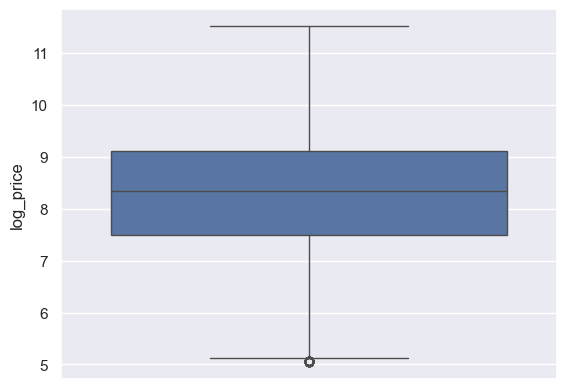

In [444]:
sns.boxplot(data['log_price'])

In [445]:
data = del_outliers_categorial(data, 'brand', 'log_price', 3)
data = del_outliers_categorial(data, 'model', 'log_price', 3)
data = del_outliers_categorial(data, 'vehicleType', 'log_price', 2)
data = del_outliers_categorial(data, 'gearbox', 'log_price', 2)
data = del_outliers_categorial(data, 'notRepairedDamage', 'log_price', 1)
data = del_outliers_categorial(data, 'powerPS', 'log_price', 2)
data = del_outliers_categorial(data, 'kilometer', 'log_price', 2)
data = del_outliers_categorial(data, 'autoAgeMonths', 'log_price', 2)

In [446]:
data_brand_stat = data.groupby('brand').aggregate({'log_price' : 'median'}).reset_index()

In [447]:
data['brand'] = data['brand'].map(pd.Series(data_brand_stat.log_price.values, index = data_brand_stat.brand).to_dict())

In [448]:
data_model_stat = data.groupby('model').aggregate({'log_price' : 'median'}).reset_index()
data['model'] = data['model'].map(pd.Series(data_model_stat.log_price.values, index = data_model_stat.model).to_dict())

In [449]:
data_model_stat

,model,log_price
0,100,7.309542
1,145,6.684612
2,147,7.701188
3,156,7.244228
4,159,8.828341
...,...,...
244,yaris,8.242493
245,yeti,9.510445
246,ypsilon,7.080868
247,z_reihe,9.305469


In [450]:
data['vehicleType'] = data['vehicleType'].map(pd.Series([i + 1 for i in range(8)], ['suv', 'cabrio', 'coupe', 'bus', 'kombi', 'limousine', 'andere', 'kleinwagen']).to_dict())

In [451]:
data['gearbox'] = data['gearbox'].map({'automatik' : 1, 'manuell' : 0})

In [452]:
data['notRepairedDamage'] = data['notRepairedDamage'].map({'ja' : 1, 'nein': 0})

In [453]:
data['bias'] = 1

In [454]:
data['fuelType'] = data['fuelType'].map(pd.Series([i + 1 for i in range(7)], ['hybrid', 'elektro', 'diesel', 'cng', 'andere', 'lpg', 'benzin']).to_dict())

In [455]:
data['fuelType_2'] = np.square(data['fuelType'])

In [456]:
data

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,log_price,bias,fuelType_2
0,8.366370,8.160518,8,0,7,0,75,150000,177,7.313220,1,49
1,8.665441,8.242756,8,0,3,0,69,90000,93,8.188689,1,9
2,8.853523,8.411833,6,0,7,1,102,150000,246,6.476972,1,49
3,7.972466,7.955074,2,0,7,0,109,150000,140,7.696213,1,49
4,8.111628,7.824046,6,0,7,0,105,150000,136,7.600902,1,49
...,...,...,...,...,...,...,...,...,...,...,...,...
241185,8.366370,8.160518,6,0,3,0,140,150000,69,8.974618,1,9
241186,8.366370,8.817298,6,0,7,1,225,150000,142,8.070906,1,49
241187,8.293800,8.354674,2,1,7,0,101,125000,192,7.089243,1,49
241188,8.366370,8.961879,4,0,3,0,102,150000,241,9.126959,1,9


In [457]:
X = data.drop(columns = ['log_price'])
Y = data['log_price']

In [458]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=16)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_val, Y_train_val, test_size = 0.1111111111111111, random_state=16)

In [201]:
def count_outliers(df, column, target_col, acseptable_per):
    values_to_clear = []
    for value in set(df[column].values):
        values_count = df[df[column] == value].shape[0]
        MKP = df[df[column] == value][target_col].quantile(0.75) - df[df[column] == value][target_col].quantile(0.25)
        lower_bound = df[df[column] == value][target_col].quantile(0.25) - 1.5 * MKP
        upper_bound = df[df[column] == value][target_col].quantile(0.75) + 1.5 * MKP
        outliers_count = values_count - df[(df[column] == value) & (df[target_col] > lower_bound ) & (df[target_col] < upper_bound)].shape[0]
        print(value, 'values: ', values_count, \
            'outliers: ', outliers_count, '%: ', outliers_count/values_count * 100)
        if (outliers_count/values_count * 100) < acseptable_per:
            values_to_clear.append(value)
    return values_to_clear

In [202]:
def del_outliers_categorial(df, column, target_col, acseptable_per):
    for value in set(df[column].values):
        values_count = df[df[column] == value].shape[0]
        MKP = df[df[column] == value][target_col].quantile(0.75) - df[df[column] == value][target_col].quantile(0.25)
        lower_bound = df[df[column] == value][target_col].quantile(0.25) - 1.5 * MKP
        upper_bound = df[df[column] == value][target_col].quantile(0.75) + 1.5 * MKP
        indexes_to_drop = df[(df[column] == value) & ((df[target_col] < lower_bound ) | (df[target_col] > upper_bound))].index
        if ((len(indexes_to_drop) / values_count * 100 <= acseptable_per)):
            df = df.drop(indexes_to_drop)
    return df

In [203]:
def get_feature_stat(df, f_name, target_col):
    df_for_stat = df.groupby(f_name)[target_col].agg(['mean', 'count']).reset_index().\
            rename(columns = {'mean' : 'mean_price'}).sort_values('mean_price', ascending = False)
    print(df_for_stat[f_name].values)
    plt.figure(figsize = (20, 10))
    plt.xticks(rotation= 45)
    plt.scatter(df_for_stat[f_name], df_for_stat['count'])
    plt.ylabel('count_sels')
    plt.show()
    plt.figure(figsize = (20, 10))
    plt.xticks(rotation= 45)
    df_for_stat = df_for_stat.sort_values('mean_price', ascending = False)
    plt.plot(df_for_stat[f_name], df_for_stat['mean_price'])
    plt.ylabel('mean_price')
    plt.show()


In [204]:
def del_outliers_numeric(df, column):
    MKP = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_bound = df[column].quantile(0.25) - 1.5 * MKP
    upper_bound = df[column].quantile(0.75) + 1.5 * MKP
    return df[(df[column] > lower_bound ) & (df[column] < upper_bound)]

In [270]:
scaler = StandardScaler()
scaler.fit(data)
scaler.transform(data)

array([[ 0.0100614 , -0.26015752,  1.37983082, ..., -0.9268941 ,
         0.        ,  0.75280919],
       [ 0.65966315, -0.12796207,  1.37983082, ..., -0.10819781,
         0.        , -1.34850404],
       [ 1.06818982,  0.14382341,  0.35233693, ..., -1.70891305,
         0.        ,  0.75280919],
       ...,
       [-0.14756716,  0.05194286, -1.70265085, ..., -1.13634684,
         0.        ,  0.75280919],
       [ 0.0100614 ,  1.02800756, -0.67515696, ...,  0.76922685,
         0.        , -1.34850404],
       [ 1.06818982,  3.16364476,  0.35233693, ...,  1.8425451 ,
         0.        ,  0.75280919]])

EXPLORE PIPLINE AND COLUMN TRANSFORMER

<Axes: xlabel='autoAgeMonths', ylabel='price'>

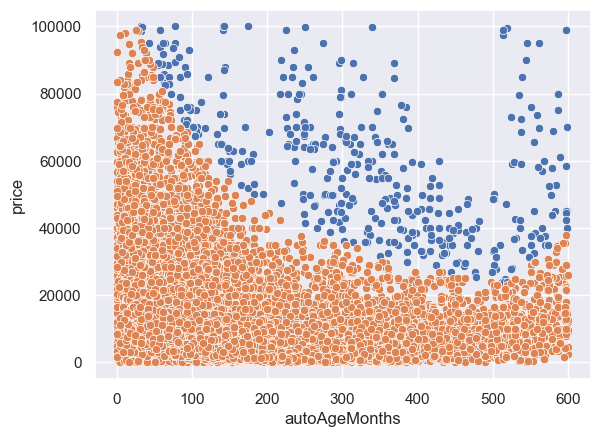

In [305]:
no_v_d = data[((data['price'] / 166) < (90000 / (data['autoAgeMonths'] + 120))) | (data['price'] < (200 *  data['autoAgeMonths'] - 80000))]
sns.scatterplot(x = data.autoAgeMonths, y = data.price)
sns.scatterplot(x = no_v_d.autoAgeMonths, y = no_v_d.price)

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [662]:
train_data = del_outliers_categorial(train_data, 'brand', 'price', 3)

In [663]:
train_data = del_outliers_categorial(train_data, 'model', 'price', 3)

In [664]:
train_data = del_outliers_categorial(train_data, 'vehicleType', 'price', 3)

In [665]:
train_data = del_outliers_categorial(train_data, 'kilometer', 'price', 3)

In [666]:
train_data = del_outliers_categorial(train_data, 'notRepairedDamage', 'price', 3)

In [667]:
train_data = train_data[((train_data['price'] / 166) < (90000 / (train_data['autoAgeMonths'] + 120))) | (train_data['price'] < (200 *  train_data['autoAgeMonths'] - 80000))]

In [668]:
set(X_train.fuelType.values)

{'andere', 'benzin', 'cng', 'diesel', 'elektro', 'hybrid', 'lpg'}

In [669]:
categorical_LabelEncoder = [0, 1, 2, 4]
categorical_ohe = [3, 5]
numeric = [6, 7, 8]

# YOUR CODE (EDA):

In [670]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price']

NameError: name 'other' is not defined

In [167]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

categories = [['porsche', 'land_rover', 'jaguar', 'jeep', 'audi', 'mini', 'bmw',
                                                     'mercedes_benz', 'skoda', 'chevrolet', 'volkswagen', 'kia', 'dacia', 'volvo',
                                                     'hyundai', 'toyota', 'seat', 'subaru', 'nissan', 'mazda', 'chrysler',
                                                     'alfa_romeo', 'honda', 'ford', 'suzuki', 'saab', 'smart', 'citroen', 'peugeot',
                                                     'mitsubishi', 'lada', 'opel', 'fiat', 'lancia', 'renault', 'daihatsu', 'rover',
                                                     'daewoo'],
                                                 ['discovery_sport', '911', 'gl', 'range_rover_evoque', 'm_reihe', 'q3', 'q5', 'glk', 'cayenne', 
                                                  'g_klasse', '6er', 'defender', 'amarok', 'range_rover_sport', 'boxster', 'q7', 'a5', 'rangerover', 
                                                  'sl', 'viano', 'cx_reihe', 'wrangler', 'mustang', 'v60', 'cc', 'x_reihe', 'tiguan', 'touareg', 'kuga', 
                                                  'discovery', 'xc_reihe', 'yeti', 'a1', 'tt', 'cl', 'z_reihe', 'm_klasse', 'sportage', 'serie_3', 'qashqai', 
                                                  'b_max', 'insignia', 'serie_2', 's_klasse', 'scirocco', 'i3', 'superb', 'juke', '1er', 'eos', 'slk', 'a8', 
                                                  'exeo', 'transporter', 's_max', 'clubman', 'phaeton', 'cooper', 'outlander', 'navara', 'crossfire', 'lodgy', 
                                                  'b_klasse', '300c', 'antara', 'captiva', 'range_rover', '7er', 'v_klasse', 'kaefer', 'duster', 'auris', 'a6', 
                                                  'e_klasse', 'grand', 'c_reihe', '5er', 'a3', 'ceed', 'i_reihe', 'rav', '5_reihe', 'sorento', 'vivaro', '500', 
                                                  'touran', 'spider', 'leon', 'octavia', 'beetle', 'up', 'alhambra', 'caddy', 'c_klasse', 'one', 'freelander', 
                                                  'santa', 'a4', '159', 'andere', 'citigo', 'mii', 'verso', 'sharan', 'vito', 'forester', 'roomster', 'cr_reihe', 
                                                  'tucson', 'impreza', 'sprinter', 'lancer', '3er', 'c_max', 'x_trail', 'delta', 'jimny', 'altea', 'clk', 's60', 
                                                  'pajero', 'v50', 'avensis', 'cherokee', 'c4', 'rx_reihe', 'mx_reihe', 'golf', 'terios', 'passat', 'x_type', 'jetta', 
                                                  'transit', 'note', 'roadster', 'c5', 'v70', 'accord', 'materia', 'spark', 'meriva', 'ducato', 'aveo', 'a_klasse', 
                                                  'sandero', 'rio', 'galaxy', '200', 'jazz', 's_type', 'fabia', 'aygo', 'swift', 'ibiza', 'focus', 'fortwo', 'yaris', 
                                                  '6_reihe', 'croma', 'zafira', 'a2', 'c1', 'niva', 'berlingo', '4_reihe', '3_reihe', 'megane', 'logan', 'c3', 'doblo', 
                                                  'polo', 'signum', 'astra', 'picanto', '2_reihe', 'fiesta', 'civic', 'panda', 'modus', 'mondeo', 'fusion', 'musa', 'legacy', 
                                                  'tigra', '900', 'bravo', 'fox', 'ptcruiser', 'kadett', 'kangoo', 'scenic', 'combo', '9000', 'colt', 'corolla', 'c2', 'forfour', 
                                                  'laguna', '90', 'clio', 'espace', 'sirion', 'corsa', 'toledo', 'kappa', 'charade', 'calibra', 'bora', 'carnival', '147', 
                                                  'agila', 'micra', '1_reihe', 'kalina', 'voyager', 'getz', 'v40', 'vectra', 'ka', '100', 'punto', 'samara', 'matiz', 'twingo', 
                                                  'justy', 'stilo', '80', 'lupo', '156', 'almera', '850', 'primera', 'ypsilon', 'cuore', 'kalos', 'galant', 'arosa', '145', 'omega', 
                                                  'escort', 'cordoba', 'carisma', 'seicento', 'lybra', 'nubira', 'r19', 'lanos', 'move', 'elefantino'],
                                                 ['suv', 'coupe', 'cabrio', 'bus', 'limousine', 'kombi', 'andere', 'kleinwagen'],
                                                 ['hybrid', 'elektro', 'diesel', 'benzin', 'cng', 'andere', 'lpg']
                                                 ]
# LabelEncoder_transformer = ColumnTransformer([
#     ('LabelEncoder', OrdinalEncoder(categories = categories,
#                                     handle_unknown='use_encoded_value', unknown_value = -1), categorical_LabelEncoder)],
#     remainder='passthrough',
#     # verbose_feature_names_out=False
# )

LabelEncoder_num_pipline = Pipeline([
    ('LabelEncoder', OrdinalEncoder(categories = categories, handle_unknown='use_encoded_value', unknown_value = -1)),
    ("StandardScaler", StandardScaler()),
    ("PolynomialFeatures", PolynomialFeatures(degree = 9))
])

numeric_pipeline = Pipeline([
    ("StandardScaler", StandardScaler()),
    ("PolynomialFeatures", PolynomialFeatures(degree = 9))
])

numeric_ohe_transformer = ColumnTransformer([
    ("numeric_pipeline", numeric_pipeline, numeric),
    ('ohe', OneHotEncoder(), categorical_ohe),
    ('LabelEncoder', LabelEncoder_num_pipline, categorical_LabelEncoder)],
    # remainder='passthrough',
    # verbose_feature_names_out=False
)

# preprocessor = make_pipeline(
#     LabelEncoder_transformer,
#     numeric_ohe_transformer
# )

pipline_final = Pipeline([
    ("preprocessor", numeric_ohe_transformer), 
    ("regression", Ridge())
])

# x = column_transformer.fit_transform(x)

NameError: name 'numeric' is not defined

In [1]:
14/3


4.666666666666667

In [1]:
pipline_final

NameError: name 'pipline_final' is not defined

In [722]:
# r = Ridge()
# r.fit(X_train[['notRepairedDamage']], Y_train)

In [723]:
model = pipline_final.fit(X_train, Y_train)
from sklearn.metrics import root_mean_squared_error
Y_pred_train = model.predict(X_test)
print("Train RMSE = %.4f" % root_mean_squared_error(Y_test, Y_pred_train))

C:\Users\annam\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.83079e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train RMSE = 4287.4899


In [724]:
np.median(np.abs(100 - (Y_test/Y_pred_train) * 100))

21.949326387774832

Text(0, 0.5, 'amount')

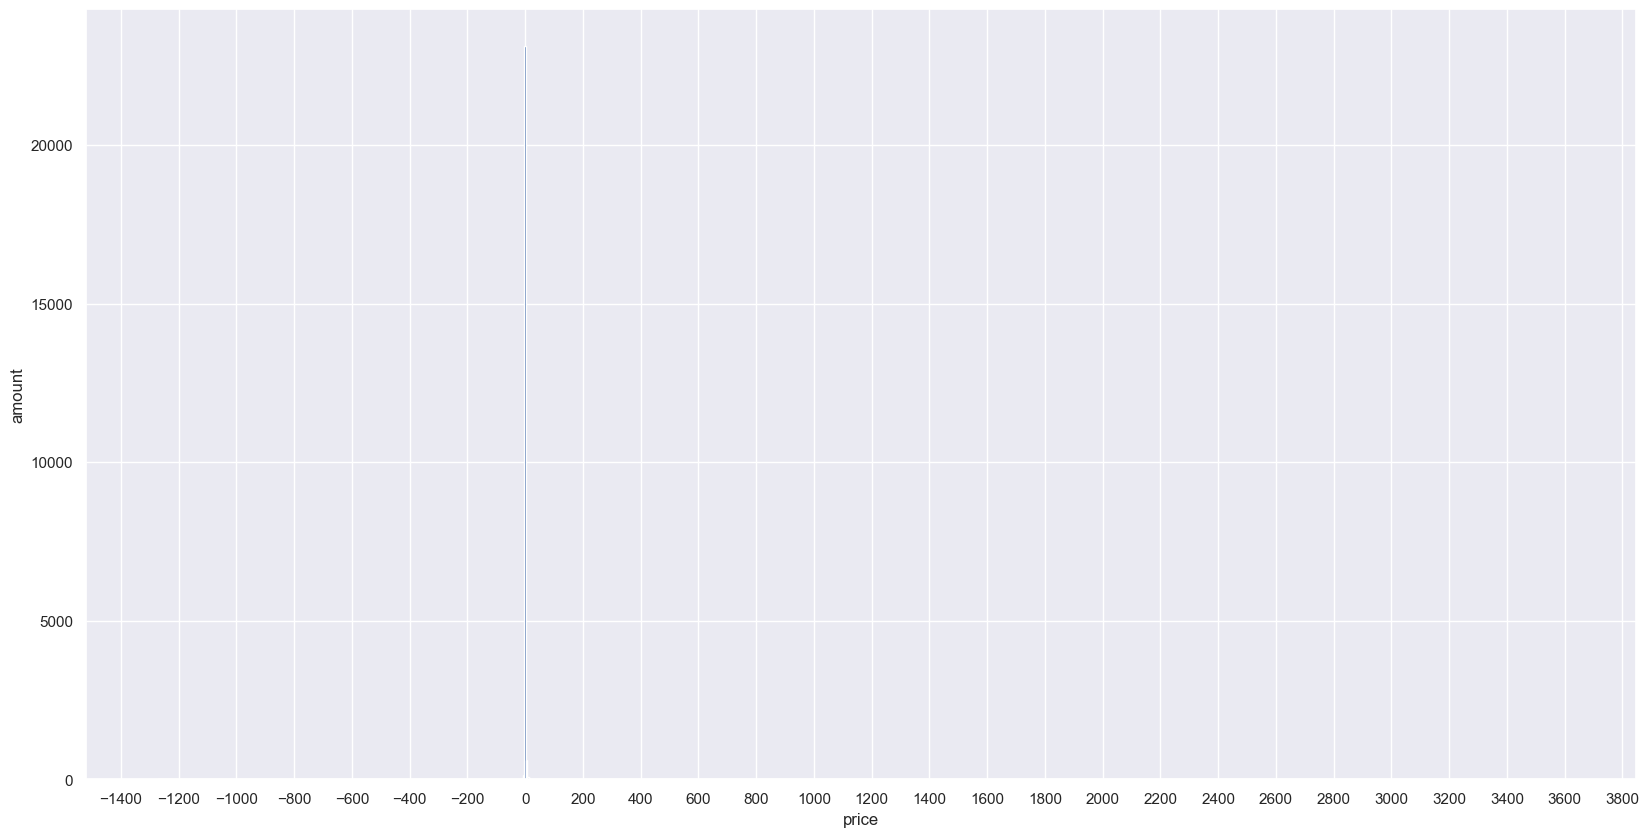

In [725]:
plt.figure(figsize = (20, 10))
plt.hist((Y_test/Y_pred_train), bins = 1000)
plt.locator_params (axis='x', nbins= 40 )
plt.xlabel('price')
plt.ylabel('amount')

In [571]:
o = OneHotEncoder()
print(o.fit_transform(X_train.iloc[:10, [6, 7, 8]]))

  (0, 7)	1.0
  (0, 14)	1.0
  (0, 19)	1.0
  (1, 1)	1.0
  (1, 11)	1.0
  (1, 16)	1.0
  (2, 6)	1.0
  (2, 12)	1.0
  (2, 17)	1.0
  (3, 2)	1.0
  (3, 13)	1.0
  (3, 21)	1.0
  (4, 5)	1.0
  (4, 14)	1.0
  (4, 20)	1.0
  (5, 8)	1.0
  (5, 13)	1.0
  (5, 18)	1.0
  (6, 9)	1.0
  (6, 14)	1.0
  (6, 22)	1.0
  (7, 0)	1.0
  (7, 14)	1.0
  (7, 23)	1.0
  (8, 3)	1.0
  (8, 14)	1.0
  (8, 24)	1.0
  (9, 4)	1.0
  (9, 10)	1.0
  (9, 15)	1.0


In [435]:
# YOUR CODE (data split into train/val/test):

SHIFT + TAB = SEE DOCK OF METHOD

In [727]:
repr(numeric_pipeline)

"Pipeline(steps=[('StandardScaler', StandardScaler()),\n                ('PolynomialFeatures', PolynomialFeatures(degree=9))])"

In [728]:
eval(repr(numeric_pipeline))

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('PolynomialFeatures', PolynomialFeatures(degree=9))])

In [459]:
X_train, X_valid, Y_train, Y_valid, X_test, Y_test
scaler = StandardScaler()
scaler.fit(data.drop(columns = ['log_price']))
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [421]:
# X_valid = np.array(X_valid)
# X_test = np.array(X_test)
# X_train = np.array(X_train)

In [460]:
Y

array([[-1.34901511, -0.80102726, -0.16141001, ...,  0.18442448,
         0.        , -1.34850404],
       [ 0.0100614 , -0.26015752, -0.16141001, ...,  0.69564077,
         0.        ,  0.75280919],
       [ 1.21835743,  0.57924735, -0.16141001, ..., -1.40449102,
         0.        , -1.34850404],
       ...,
       [-0.77261359, -0.0862072 , -0.67515696, ..., -0.53404166,
         0.        ,  0.75280919],
       [-1.34901511,  1.67267624, -0.16141001, ..., -0.82419145,
         0.        , -1.34850404],
       [-1.34901511,  1.67267624,  0.35233693, ..., -1.47357431,
         0.        , -1.34850404]])

In [505]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, Y_train)
from sklearn.metrics import root_mean_squared_error
Y_pred_train = model.predict(X_test)
print("Train R2 = %.4f" % r2_score(Y_test, Y_pred_train))

Train R2 = 0.7665


In [503]:
np.mean(np.abs(100 - (Y_test/Y_pred_train) * 100))

4.649658214895182

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [434]:
Y_valid

20856     7.955074
63201     7.575585
137364    9.862145
115503    9.464983
149985    9.615805
            ...   
235523    9.464905
192848    7.600902
170895    8.006368
29679     8.779557
210172    9.609116
Name: log_price, Length: 23459, dtype: float64

In [514]:
from sklearn.metrics import r2_score
dimension = len(X_valid[0])

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'lambda_': -1,
        'dimension': dimension
    }
}
steps_of_all = []
lambdas = np.logspace(-5, -1, 40)
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    best_err = 1000000000000000
    best_lambda = -1
    lost_hist = []
    for lam in lambdas:
        descent_config['descent_name'] = descent_name
        descent_config['kwargs']['lambda_'] = lam
        regression = MyLinearRegression(
            descent_config = descent_config,
        )
        regression.fit(X_valid, Y_valid.to_numpy())
        loss = regression.calc_loss(X_train, Y_train.to_numpy())
        # print(regression.predict(X_train))
        # loss = r2_score(Y_train.to_numpy(), regression.predict(X_train))
        print(r2_score(Y_train.to_numpy(), regression.predict(X_train)))
        if loss < best_err:
            best_err = loss
            best_lambda = lam
            lost_hist = regression.loss_history
        #upd best... by train
    print(descent_name, 'best lambda =', best_lambda, 'best_err:', best_err,' steps:', len(lost_hist))
    steps_of_all.append(lost_hist)

    

-64.00903763491904
-64.23399558467774
-62.68481610002094
-64.73759475497934
-63.562328358613
-65.10516187491244
-63.00523149822048
-64.07124948093838
-65.27123175627055
-65.50882163720654
-65.76377466716028
-65.8148073447386
-63.7775842804987
-64.52552172536447
-64.63103851156349
-64.77789787872209
-65.18427246283002
-66.20948260033
-69.07817789795232
-65.05054518201294
-65.92097571922307
-63.4803275626829
-65.06279354911747
-64.88164887806006
-62.2349018803696
-64.95459228144618
-63.00326016898768
-64.03701124189742
-62.9913907885483
-64.17331936788689
-63.158918438077805
-61.9686547746984
-61.539901356346974
-61.70573819199554
-61.734853803723
-61.53645211103823
-60.79672230443046
-60.190271617942635
-60.03512360303239
-59.9062826008769
full best lambda = 0.1 best_err: 69.57034687534771  steps: 14
-63.5803402904118
-65.79767989464314
-65.74785877507186
-66.48095279846666
-65.20953619763132
-63.378041298063835
-66.48477169386554
-62.5034176384551
-66.92590427431793
-62.08589109412066


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

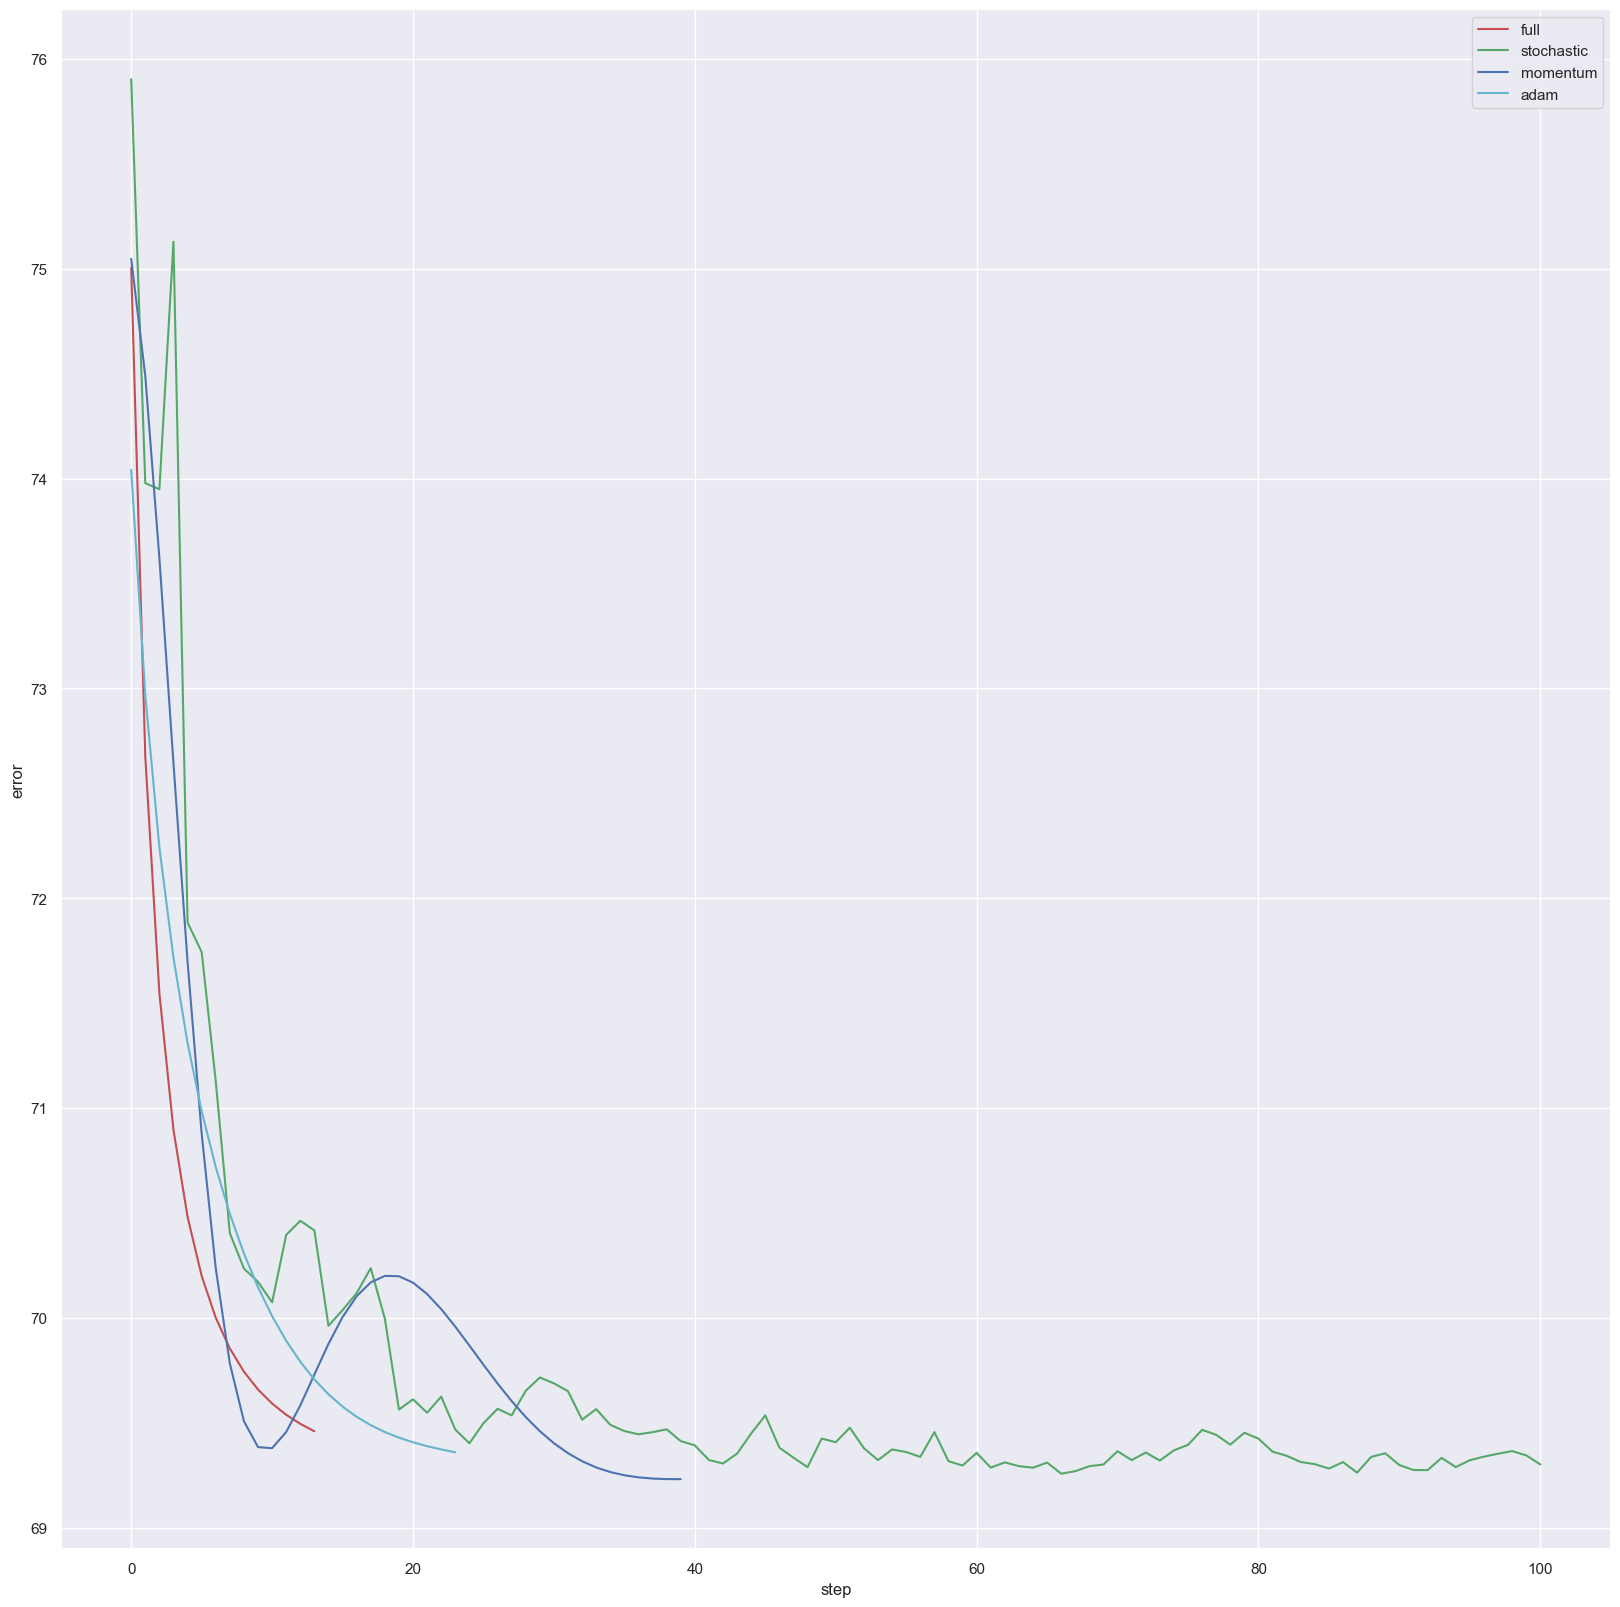

In [515]:
plt.figure(figsize = (20, 20))
plt.plot([i for i in range(len(steps_of_all[0]))], steps_of_all[0], color='r', label='full')
plt.plot([i for i in range(len(steps_of_all[1]))], steps_of_all[1], color='g', label='stochastic')
plt.plot([i for i in range(len(steps_of_all[2]))], steps_of_all[2], color='b', label='momentum')
plt.plot([i for i in range(len(steps_of_all[3]))], steps_of_all[3], color='c', label='adam')
plt.xlabel("step")
plt.ylabel("error")
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

In [492]:
# YOUR CODE:

`### ваше решение тут ###`

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [368]:
import time
batch_sizes = np.arange(5, 500, 10)
descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        # 'lambda_': 0.04806380863064394,
        'dimension': dimension,
        'batch_size' : 0
    }
}
times = []
steps = []
repeat_times = 10000
for b_size in batch_sizes:
    steps_mean = 0
    time_mean = 0
    for i in range(repeat_times):
        descent_config['kwargs']['batch_size'] = b_size
        regression = LinearRegression(
            descent_config = descent_config,
        )
        time_mean -= time.perf_counter()
        regression.fit(X_valid, Y_valid.to_numpy())
        time_mean += time.perf_counter()
        # print(time.time())
        # loss = regression.calc_loss(X_train, Y_train.to_numpy())
        steps_mean += len(regression.loss_history)
    steps_mean /= float(repeat_times)
    time_mean /= float(repeat_times)
    steps.append(steps_mean)
    times.append(time_mean)
    
# YOUR CODE:

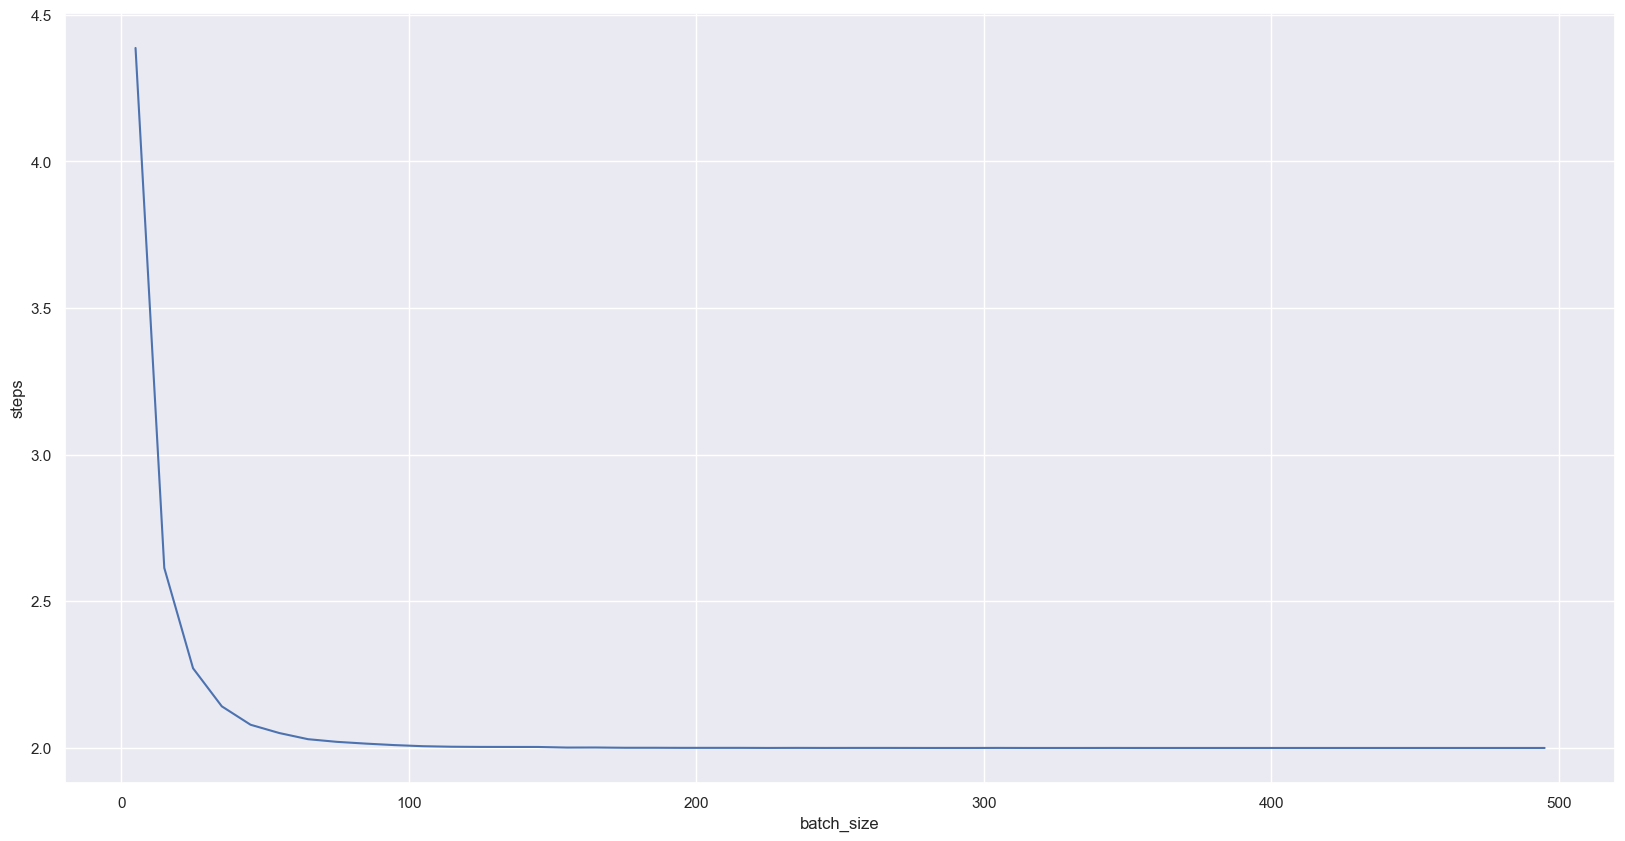

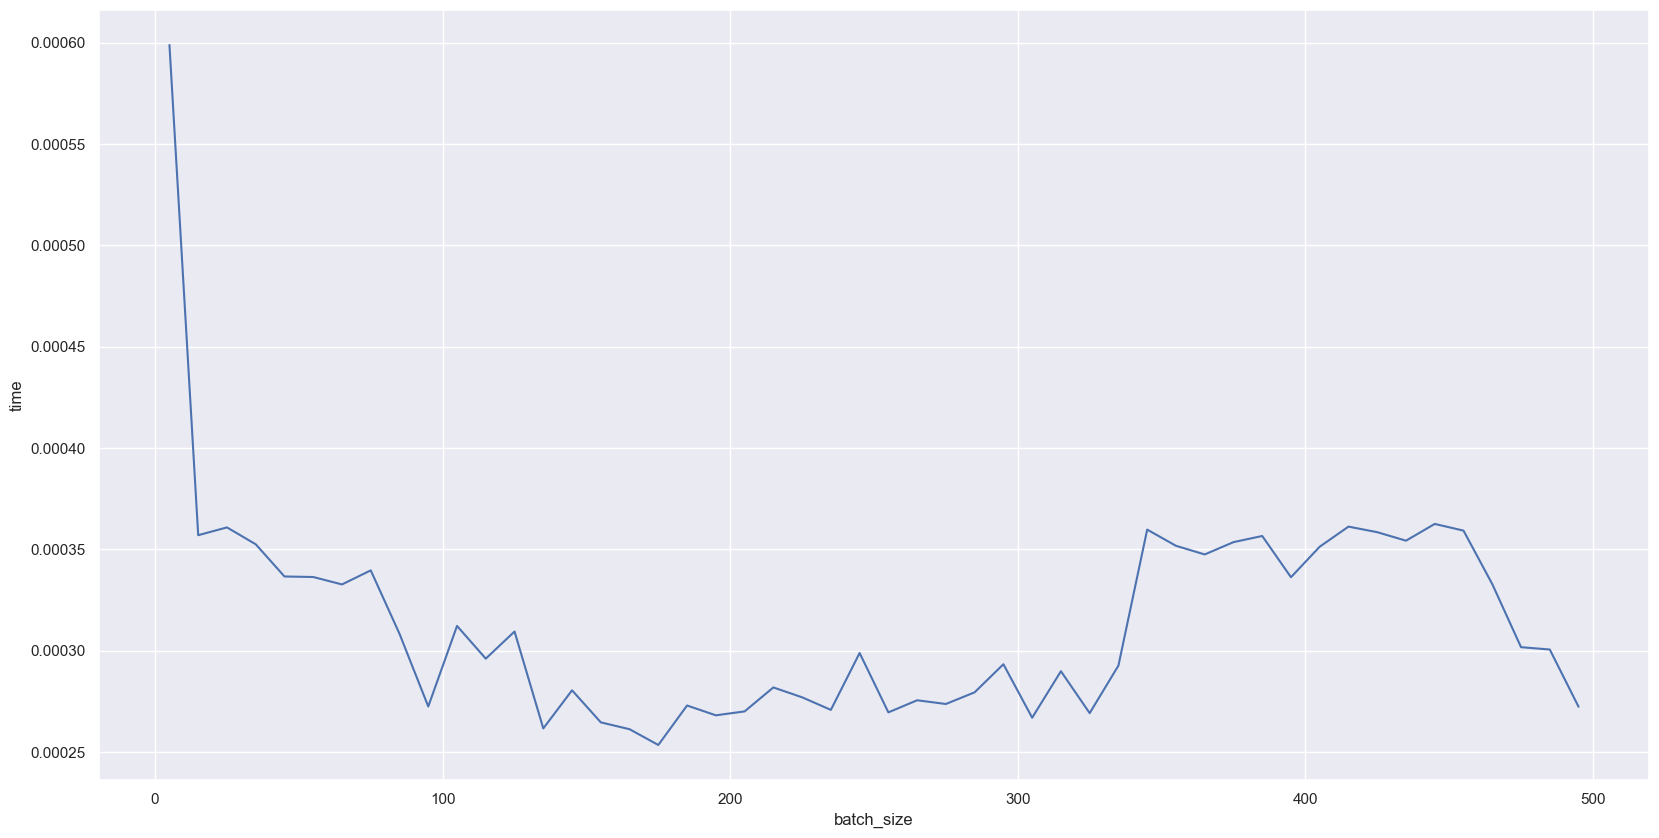

In [369]:
plt.figure(figsize = (20, 10))
plt.plot(batch_sizes, steps)
plt.xlabel("batch_size")
plt.ylabel("steps")
plt.show()

plt.figure(figsize = (20, 10))
plt.plot(batch_sizes, times)
plt.xlabel("batch_size")
plt.ylabel("time")
plt.show()

`### ваше решение тут ###`

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [744]:
x = np.linspace(0, 1, 100)
y = np.cos(1.5 * np.pi * x)
np.random.seed(36)
x_objects = np.random.uniform(0, 1, size = 30)
y_objects = np.cos(1.5 * np.pi * x_objects) + np.random.normal(scale=0.1, size=x_objects.shape)

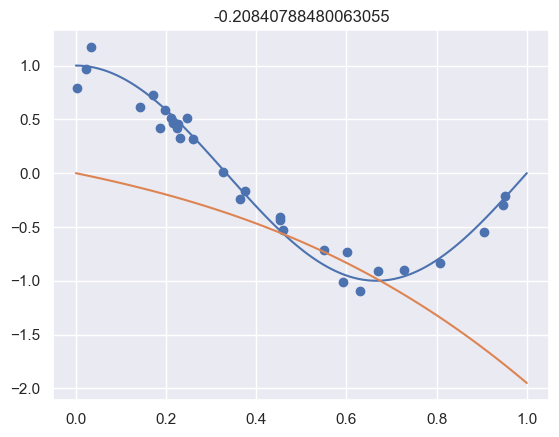

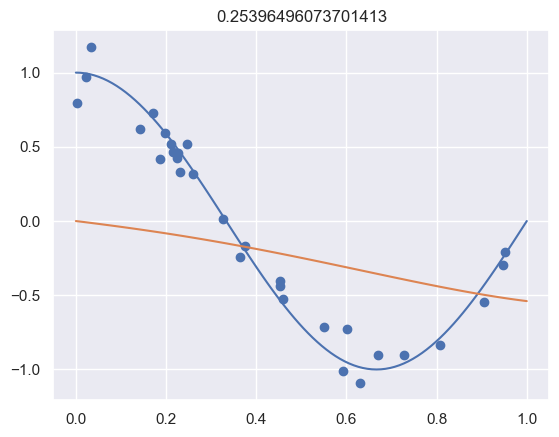

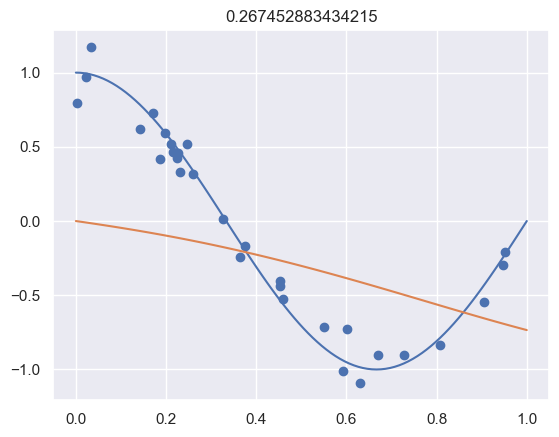

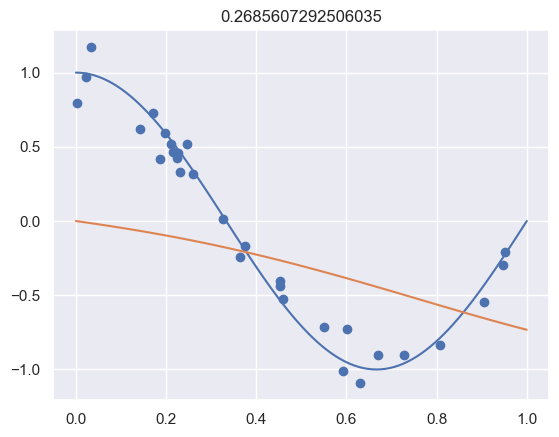

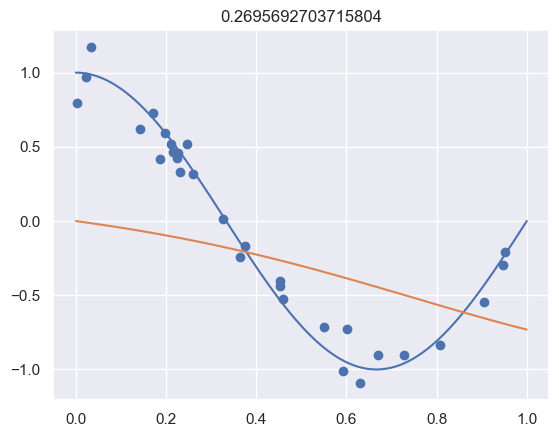

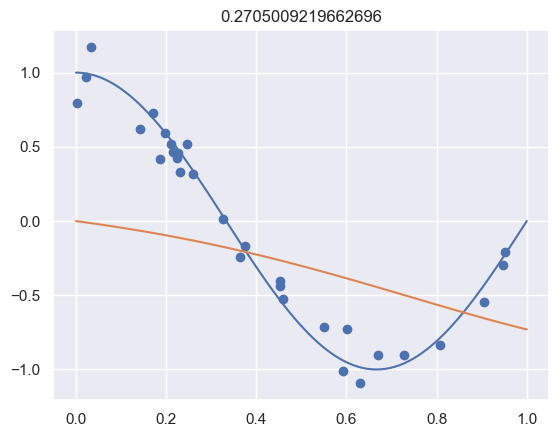

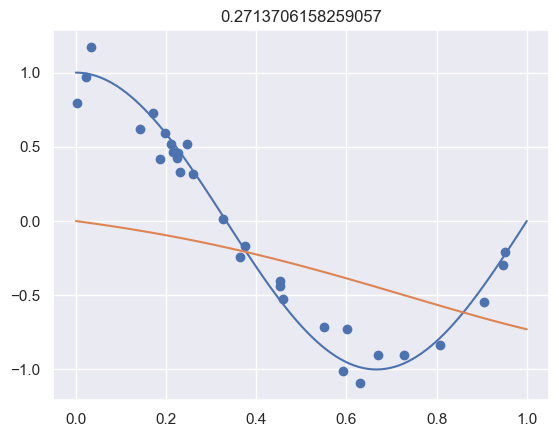

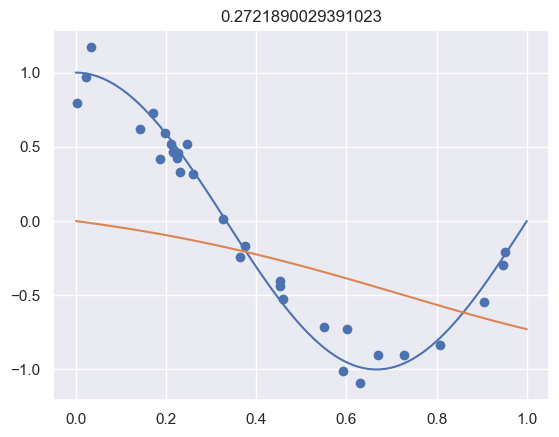

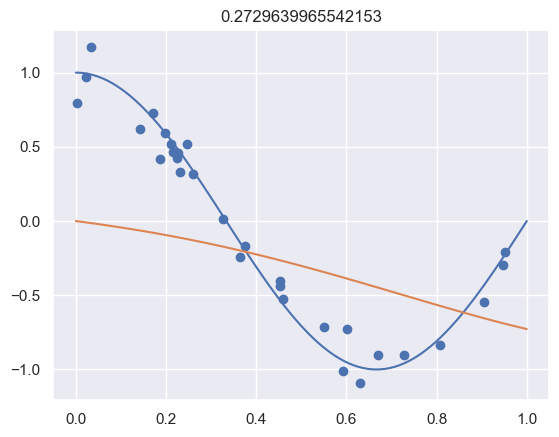

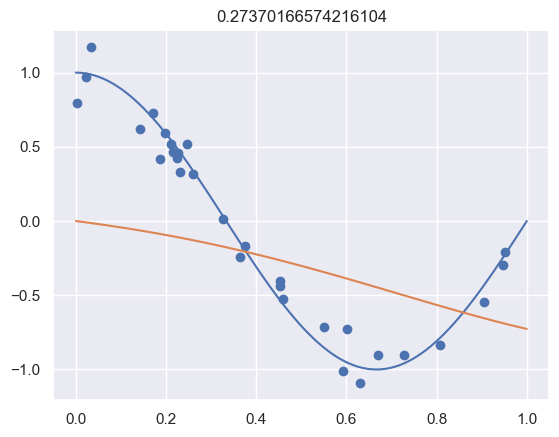

In [753]:
descent_config = {
    'descent_name': 'full',
    # 'tolerance' : 1e-10,
    'kwargs': {
        'dimension': 4,
        'lambda_' : 2,
    }
}
degree = 4
X_objects_with_degree = PolynomialFeatures(degree, include_bias=False).fit_transform(x_objects[:, None])
X_all_with_degree = PolynomialFeatures(degree, include_bias=False).fit_transform(x[:, None])
descent_config['kwargs']['dimension'] = degree
descent = get_descent(descent_config)
for _ in range(10):
    step = descent.step(X_objects_with_degree, y_objects)
    y_pred = descent.predict(X_all_with_degree)
    plt.scatter(x_objects, y_objects, label = "Data")
    plt.plot(x, y, label="Real function")
    plt.plot(x, y_pred, label="Prediction")
    plt.title(r2_score(y_objects, descent.predict(X_objects_with_degree)))
    plt.show()

    # X_objects_with_degree = PolynomialFeatures(degree, include_bias=False).fit_transform(x_objects[:, None])
    # X_all_with_degree = PolynomialFeatures(degree, include_bias=False).fit_transform(x[:, None])
    # descent_config['kwargs']['dimension'] = degree
    # regr = MyLinearRegression(descent_config = descent_config)
    # # print(X_objects, y_objects)
    # regr.fit(X_objects_with_degree, y_objects)
    # y_pred = regr.predict(X_all_with_degree)
    # print(r2_score(y, y_pred))
    # axs[i].scatter(x_objects, y_objects, label = "Data")
    # axs[i].plot(x, y, label="Real function")
    # axs[i].plot(x, y_pred, label="Prediction")
    # axs[i].set_title("Degree = %d" % degree)

51
[-0.00320196]
163
[ 0.00300852 -0.00809521  0.00306359  0.00321948]
462
[ 0.00145472 -0.00607789  0.00294167  0.00472025  0.00239927 -0.00120244
 -0.00475409]


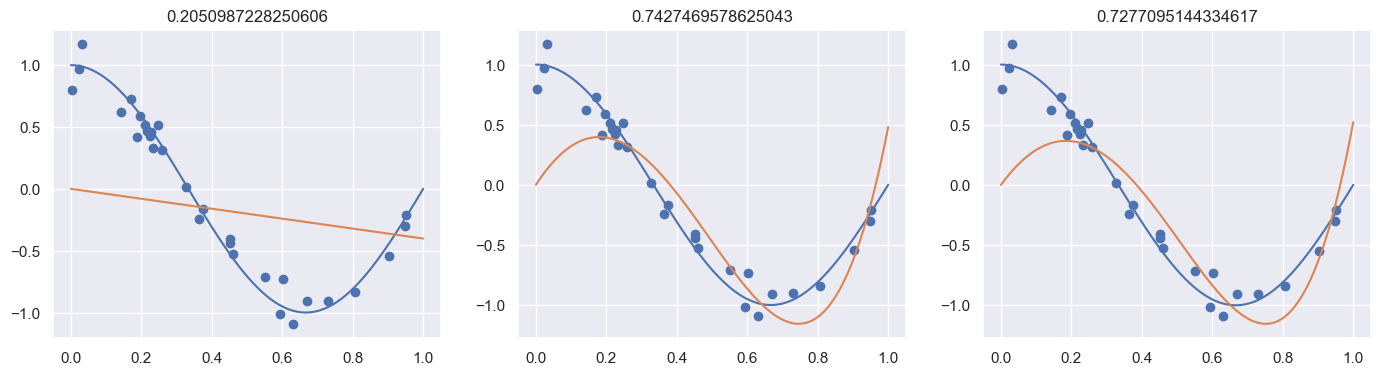

In [823]:
descent_config = {
    'descent_name': 'momentum',
    'regularized': True,
    # 'tolerance' : 1e-10,
    'kwargs': {
        'dimension': 4,
        'lambda_' : 8
        
    }
}
fig, axs = plt.subplots(figsize=(17, 4), ncols=3)
from sklearn.preprocessing import PolynomialFeatures
degrees = [1, 4, 7]
for i in range (len(degrees)):
    degree = degrees[i]
    X_objects = PolynomialFeatures(degree, include_bias=False).fit_transform(x_objects[:, None])
    X_all_with_degree = PolynomialFeatures(degree, include_bias=False).fit_transform(x[:, None])
    descent_config['kwargs']['dimension'] = degree
    regr = MyLinearRegression(max_iter =  1000, descent_config = descent_config)
    regr.fit(X_objects, y_objects)
    y_all_pred = regr.predict(X_all_with_degree)
    axs[i].scatter(x_objects, y_objects, label = "Data")
    axs[i].plot(x, y, label="Real function")
    axs[i].plot(x, y_all_pred, label="Prediction")
    r2 = r2_score(y_objects, regr.predict(X_objects))
    axs[i].set_title(r2 )
    print(len(regr.loss_history))
    print(regr.last_step)


In [645]:
model = LinearRegression()
model.fit(X_train, Y_train)
print(r2_score(Y_test, model.predict(X_test)))
print(root_mean_squared_error(Y_test, model.predict(X_test)))
model.__dict__ 

0.7665232149355239
0.5173463120368323


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 11,
 'coef_': array([ 0.10542176,  0.15262697, -0.10257083,  0.01757142, -0.32386837,
        -0.16715159,  0.30416478, -0.28463748, -0.41000368,  0.        ,
         0.20378441]),
 'rank_': 10,
 'singular_': array([761.10592935, 562.98354717, 527.5178356 , 422.08556999,
        400.67349279, 391.53595267, 304.38911363, 257.46857006,
        223.09731798,   8.34684057,   0.        ]),
 'intercept_': 8.303744058981849}

In [629]:
np.random.rand(dimension)

array([0.48619234, 0.17677761, 0.92450111, 0.47194304, 0.82743291,
       0.08901375, 0.56258615, 0.75473836, 0.7401922 , 0.27343474,
       0.69262982])

In [708]:
descent_config = {
    'descent_name': 'full',
    'regularized': True,
    # 'tolerance' : 1e-10,
    'kwargs': {
        'dimension': dimension,
        # 'lambda_' : 1e-2,
        'mu' : 5
    }
}

In [709]:
regression = MyLinearRegression(
    descent_config = descent_config,
)

regression.fit(X_valid, Y_valid.to_numpy())


[ 5.37761816e-05  1.14845829e-03 -3.77421720e-03 -1.69424440e-03
 -2.94176580e-03 -3.71173386e-03 -1.01303155e-03 -5.67401717e-03
 -5.33199010e-03 -1.23703489e-03 -5.00992590e-03] 0.001 0.00012914841722047227 0.00012914841722047225
False


In [710]:
regression.descent.w

array([0.07412454, 0.06650954, 0.6925385 , 0.49865099, 0.25162079,
       0.61544305, 0.46389714, 0.92253949, 0.66184814, 0.34864927,
       0.83580533])

In [711]:
r2_score(Y_test, regression.predict(X_test))

-66.2011487108541

In [838]:
import heapq
import typing as tp


def merge(seq: tp.Sequence[tp.Sequence[int]]) -> list[int]:
    """
    :param seq: sequence of sorted sequences
    :return: merged sorted list
    """
    ans = []
    heap = [(seq[seq_ind][0], seq_ind, 0) for seq_ind in range(len(seq)) if not len(seq[seq_ind]) == 0]
    while not len(heap) == 0:
        new_el, seq_ind, el_ind = heapq.heappop(heap)
        ans.append(new_el)
        if el_ind + 1 < len(seq[seq_ind]):
            heapq.heappush(heap, (seq[seq_ind][el_ind + 1], seq_ind, el_ind + 1))
    return ans

In [923]:
"aboba".translate({ord("b") : ord("5")})

'a5o5a'

In [954]:
from typing import Callable


def count_util(text: str, flags: str | None = None) -> dict[str, int]:
    """
    :param text: text to count entities
    :param flags: flags in command-like format - can be:
        * -m stands for counting characters
        * -l stands for counting lines
        * -L stands for getting length of the longest line
        * -w stands for counting words
    More than one flag can be passed at the same time, for example:
        * "-l -m"
        * "-lLw"
    Ommiting flags or passing empty string is equivalent to "-mlLw"
    :return: mapping from string keys to corresponding counter, where
    keys are selected according to the received flags:
        * "chars" - amount of characters
        * "lines" - amount of lines
        * "longest_line" - the longest line length
        * "words" - amount of words
    """
    flag_meanings: dict[str, str] = {'m': 'chars', 'l': 'lines', 'w': 'words', 'L': 'longest_line'}
    flag_funcs: dict[str, Callable[[str], int]] = {'m': (lambda x: len(x)),
                                                   'l': (lambda x: len(x.splitlines())),
                                                   'w': (lambda x: len(x.split())),
                                                   'L': (lambda x: max([len(i) for i in x.splitlines()] + [0]))}
    if flags is None:
        flags = "-m -l -L -w"
    flags_list: list[str] = [char for char in flags if char.isalpha()]
    if len(flags_list) == 0:
        flags_list = list(flag_meanings)
    print(flags_list)
    ans: dict[str, int] = {}
    for flag in flags_list:
        ans[flag_meanings[flag]] = flag_funcs[flag](text)
    return ans


In [961]:
str_1 = """123
123"""
str_2 = "123\n123"
for s in [str_1, str_2]:
    print(s)
    for c in s:
        print(ord(c), end= ' ')
    print()

123
123
49 50 51 10 49 50 51 
123
123
49 50 51 10 49 50 51 


In [938]:
caesar_encrypt('This is stupid song stupid stupid stupid song', 10)

{97: 107, 98: 108, 99: 109, 100: 110, 101: 111, 102: 112, 103: 113, 104: 114, 105: 115, 106: 116, 107: 117, 108: 118, 109: 119, 110: 120, 111: 121, 112: 122, 113: 97, 114: 98, 115: 99, 116: 100, 117: 101, 118: 102, 119: 103, 120: 104, 121: 105, 122: 106, 65: 75, 66: 76, 67: 77, 68: 78, 69: 79, 70: 80, 71: 81, 72: 82, 73: 83, 74: 84, 75: 85, 76: 86, 77: 87, 78: 88, 79: 89, 80: 90, 81: 65, 82: 66, 83: 67, 84: 68, 85: 69, 86: 70, 87: 71, 88: 72, 89: 73, 90: 74}


'Drsc sc cdezsn cyxq cdezsn cdezsn cdezsn cyxq'

In [921]:
get_banner_indices_by_query("Джинсы 300р", {"джинсы": [0], "скидка": [0]})

['джинсы'] [0]


[]

In [907]:
d = {
    "a": 1,
    "b": {
        "c": 2,
        "d": 4
    }
}
dct = d

In [908]:
build_graph(["ac", "ab", "ba", "bc"])

{'a': {'b', 'c'}, 'c': {'b'}, 'b': set()}

In [909]:
extract_alphabet({'a': {'b', 'c'}, 'c': {'b'}, 'b': set()})

['b', 'c', 'a']


In [897]:
str1 = '1boba'
str2 = 'rg'
for el in zip(str2, str1):
    print(el)

('r', '1')
('g', 'b')


In [893]:
traverse_dictionary_iterative(d)

[('', {'a': 1, 'b': {'c': 2, 'd': 4}})]
[('b.', {'c': 2, 'd': 4})]


[('a', 1), ('b.c', 2), ('b.d', 4)]

In [863]:
res = []
traverse_dictionary_mutable(d, res)
res

[('a', 1), ('b.c', 2), ('b.d', 4)]

In [842]:
a = {"a": "1", "b": "2", "c": "1"}
print(id(a))
a["a"] = "6"
print(id(a))
a["aboba"] = "b"
print(id(a))

1921209698880
1921209698880
1921209698880


In [828]:
a = (1, 2)
id_ = id(a)
a += (3,)
id_ == id(a)

False

In [874]:
a = [1, 2]
id_ = id(a)
a += [3]
print(a.pop())
print(a)

3
[1, 2]


In [706]:
dimension = len(X_valid[0])

descent_config = {
    'descent_name': 'sto',
    'regularized': True,
    'kwargs': {
        'dimension': dimension,
        # 'lambda_': 1,
        'mu' : 1
    }
}

lambdas = [1e-3]
mus = [i for i in range(0, 50, 5)]
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    best_err = -10000000000000
    best_lambda = -1
    # lost_hist = []
    descent_config['descent_name'] = descent_name
    # for lam in lambdas:
    for mu in mus:
        descent_config['kwargs']['lambda_'] = lam
        descent_config['kwargs']['mu'] = mu
        regression = MyLinearRegression(
            descent_config = descent_config,
        )
        regression.fit(X_valid, Y_valid.to_numpy())
        loss = r2_score(Y_test.to_numpy(), regression.predict(X_test))
        # print(loss)
        if loss > best_err:
            best_err = loss
            best_lambda = lam
            best_mu = mu
    print(descent_name, 'best err', best_err, 'best lambda:', best_lambda, 'best_mu', mu)



[-0.00025494  0.00087254 -0.00108826  0.00057997 -0.00232348 -0.00078364
  0.00066569 -0.00193575 -0.00240459 -0.         -0.00231969] 0.001 2.3712962993329877e-05 2.3712962993329877e-05
False
[-0.00040684 -0.00070745 -0.0035523  -0.00164513 -0.0044934  -0.00237762
 -0.00120421 -0.00160451 -0.00263247 -0.00283624 -0.003313  ] 0.001 7.180964717194569e-05 7.180964717194568e-05
False
[-0.00032735  0.00012173 -0.00240884 -0.00047003 -0.00253779 -0.00398867
 -0.00304546 -0.00375428 -0.00428399 -0.00297383 -0.00336703] 0.001 9.039775931500815e-05 9.039775931500815e-05
False
[-0.00236889 -0.00454773 -0.0048096  -0.00203847 -0.00133303 -0.00123494
 -0.00267113 -0.00184248 -0.00289134 -0.00451936 -0.00112592] 0.001 9.746495983954271e-05 9.74649598395427e-05
False
[-0.00242131 -0.00391175 -0.0024749  -0.00159578 -0.00472987 -0.00223348
 -0.00168173 -0.00456172 -0.00153364 -0.00080923 -0.00398222] 0.001 9.969867901259007e-05 9.969867901259007e-05
False
[-0.00518151 -0.00086212 -0.00382992 -0.0009

`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
# YOUR CODE:

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: